**CREDIT CARD FRAUD DETECTION**

Before the import, check requirements.txt file.

In [1]:
#import

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
from mostlyai import MostlyAI
mostly = MostlyAI(
    api_key='mostly-3de1250ffe5a39c34efda051a4708ac2f5b9cc2c14ac12c4363e557885e46997', 
    base_url='https://app.mostly.ai'
)
import traceback
from scipy import stats

**Business needing** \
\
Predict if a future transaction could be fraudolent or none.


**Analytical understanding** \
\
This is a typical classification problem, so we'll follow a predictive approach.

**Data requirements and collection** 

For this study, we need the details of a consistent number of transactions, either fraudolent or none, such as distance from usual transactions, the price amount, use of pin number or chip and so on.

We decided to use a single dataset from Kaggle website. Here's the link: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data 
This dataframe contains eight columns, the first seven are the features and the last one contanis the target value.

The columns names are self explaining, anyway, we'll provide a short description for all of them:

* distance_from_home: the distance from home where the transaction happened;
* distance_from_last_transaction: the distance from last transaction happened;
* ratio_to_median_purchase_price: ratio of purchased price transaction to median purchase price;
* repeat_retailer: is the transaction happened from same retailer;
* used_chip: is the transaction through chip (credit card);
* used_pin_number: is the transaction happened by using PIN number;
* online_order: is the transaction an online order;
* fraud: is the transaction fraudulent.


In [2]:
# IMPORT CSV
path = 'C:\\Users\\aschiro\\OneDrive - Apparound S.p.A\\Desktop\\Progetto\\card_transdata.csv'
path_syn_df = 'C:\\Users\\aschiro\\OneDrive - Apparound S.p.A\\Desktop\\Progetto\\syn_df.csv'

df = pd.read_csv(path)

df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Data understanding**

As we can see there's seven features. \
The first tree are continuous, the remainings are categorical. The target values in the 'Fraud' column are categorical too. \
Anyway, the categorical values of this dataframe have been already converted in floating number:

In [109]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [11]:
rows = df.shape[0]
columns = df.shape[1]


print(f'This dataframe has {rows} rows and {columns} columns. \n\n')

print('Dataframe stats:', '\n', df.describe())


This dataframe has 1000000 rows and 8 columns. 


Dataframe stats: 
        distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%        

From the above stats we can gain some informations about datas distribution.

Continuous values are not normally distributed: the mean value is very close to third quartile rather than second quartile, probably due to a little group of data with huge values that 'shift' the mean value towards the third quartile.  

For example, take a look at 'distance_from_home' feature.
Its mean value is 26.63 and its third quartile is 25.74 while the second quartile is 3.88. The max value is 10632.72.

The features 'distance_from_last_transaction' and 'ratio_to_median_purchase_price' show a similar behavior.

In addition, from the target value ('fraud') we can assert that there's a little amount of fraudolent transaction and this implies that this dataframe is imbalanced.

Let's further examine the dataframe imbalancing:

In [110]:
fraud_count = df['fraud'].value_counts()[1]

perc_fraud = np.round((fraud_count/df.shape[0])*100, 2)

print(f'Percentage of fraud transaction with respect to total number of transactions is {perc_fraud} %') 

Percentage of fraud transaction with respect to total number of transactions is 8.74 %


As we said earlier, this dataframe is highly unbalanced. 

Idea: we'll make these data more balanced using AI tools after we completed data analysis.


Let's check if there are missing values.


In [14]:
print('NaN values: \n', df.isna().sum(), '\n\n') # Check for NaN values.

print('NULL values: \n', df.isnull().sum())  # Check for null values.

NaN values: 
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64 


NULL values: 
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


There are no missing or null values.


Now, we'll look if there's a correlation between each pair of indipendent continuous variables.

In this case we won't use Pearson correlation because we're not handling normal distributions. In addition, Pearson correlation is sensitive to ouliers and it evaluates only linear relationship.

So we'll use Spearman correlation. Spearman correlation enables us to assesses monotonicity, which can be linear or non-linear.

In [17]:
df_cont_feat = df[['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price']] 

spearman_corr = df_cont_feat.corr(method= 'spearman')

print(spearman_corr)

                                distance_from_home  \
distance_from_home                        1.000000   
distance_from_last_transaction           -0.001068   
ratio_to_median_purchase_price           -0.000152   

                                distance_from_last_transaction  \
distance_from_home                                   -0.001068   
distance_from_last_transaction                        1.000000   
ratio_to_median_purchase_price                       -0.000111   

                                ratio_to_median_purchase_price  
distance_from_home                                   -0.000152  
distance_from_last_transaction                       -0.000111  
ratio_to_median_purchase_price                        1.000000  


There's no strong correlation between any pair of continuous features, so we should keep all of them.


Let's focus on categorical features. We'll perform chi-squared test for each unique pair of variables.

First, we define a function to calculate and store chi square and p value. 
Then, we'll execute it and we'll evaluate if we can reject null hypothesis or not.

In [111]:
# Implement Chi-Squared test for categorical indipendent variables.


def calc_chisquared():
    cat_feat = [x for x in df.columns[3:7]] # List of categorical features
    contingency_dict = {} 

    for i, feat1 in enumerate(cat_feat): # This nested for loop and if statement below assure to pick each pair of variables once. 
        for j, feat2 in enumerate(cat_feat):
            if j > i:
                count_feat1 = np.where(df[feat1] == 1.0, 'yes', 'no')
                count_feat2 = np.where(df[feat2] == 1.0, 'yes', 'no')

                crosstab12 = pd.crosstab(index = count_feat1, columns = count_feat2, rownames = [feat1], colnames = [feat2]) # Create crosstab for each unique pair of categorical variables
                contingency12 = stats.chi2_contingency(crosstab12) # Calculate chi-squared, p_value and frequency for each pair of unique categorical variables

                # Store chi_square, p_value and isFreqArrayOk in a dictionary. isFreqArray == True assure as that chi-squared result can be trust.
                contingency_dict[str(feat1) + '&' + str(feat2)] = {'chi2': float(np.round(contingency12[0],2)), 'p_value': float(np.round(contingency12[1],2)), 'isFreqArrayOk': all(lambda f: f > 5.0 for f in contingency12[3])}
                
    return contingency_dict


for key, value in calc_chisquared().items():
    print(key, '\n')
    print(f'p-value is: {value['p_value']}')
    print(f'Can chi squared test be trusted? {value['isFreqArrayOk']} \n')
    print('-'*20)

repeat_retailer&used_chip 

p-value is: 0.18
Can chi squared test be trusted? True 

--------------------
repeat_retailer&used_pin_number 

p-value is: 0.68
Can chi squared test be trusted? True 

--------------------
repeat_retailer&online_order 

p-value is: 0.6
Can chi squared test be trusted? True 

--------------------
used_chip&used_pin_number 

p-value is: 0.16
Can chi squared test be trusted? True 

--------------------
used_chip&online_order 

p-value is: 0.83
Can chi squared test be trusted? True 

--------------------
used_pin_number&online_order 

p-value is: 0.77
Can chi squared test be trusted? True 

--------------------


Since the p-value is greater than 0.05 for each pair of categorical variables and the expected frequencies are all greater than 5.0, we can affirm that there's no correlation between them.

Now, we are going to plot continuous and categorical features against the target value.
We'll start with continuous features.

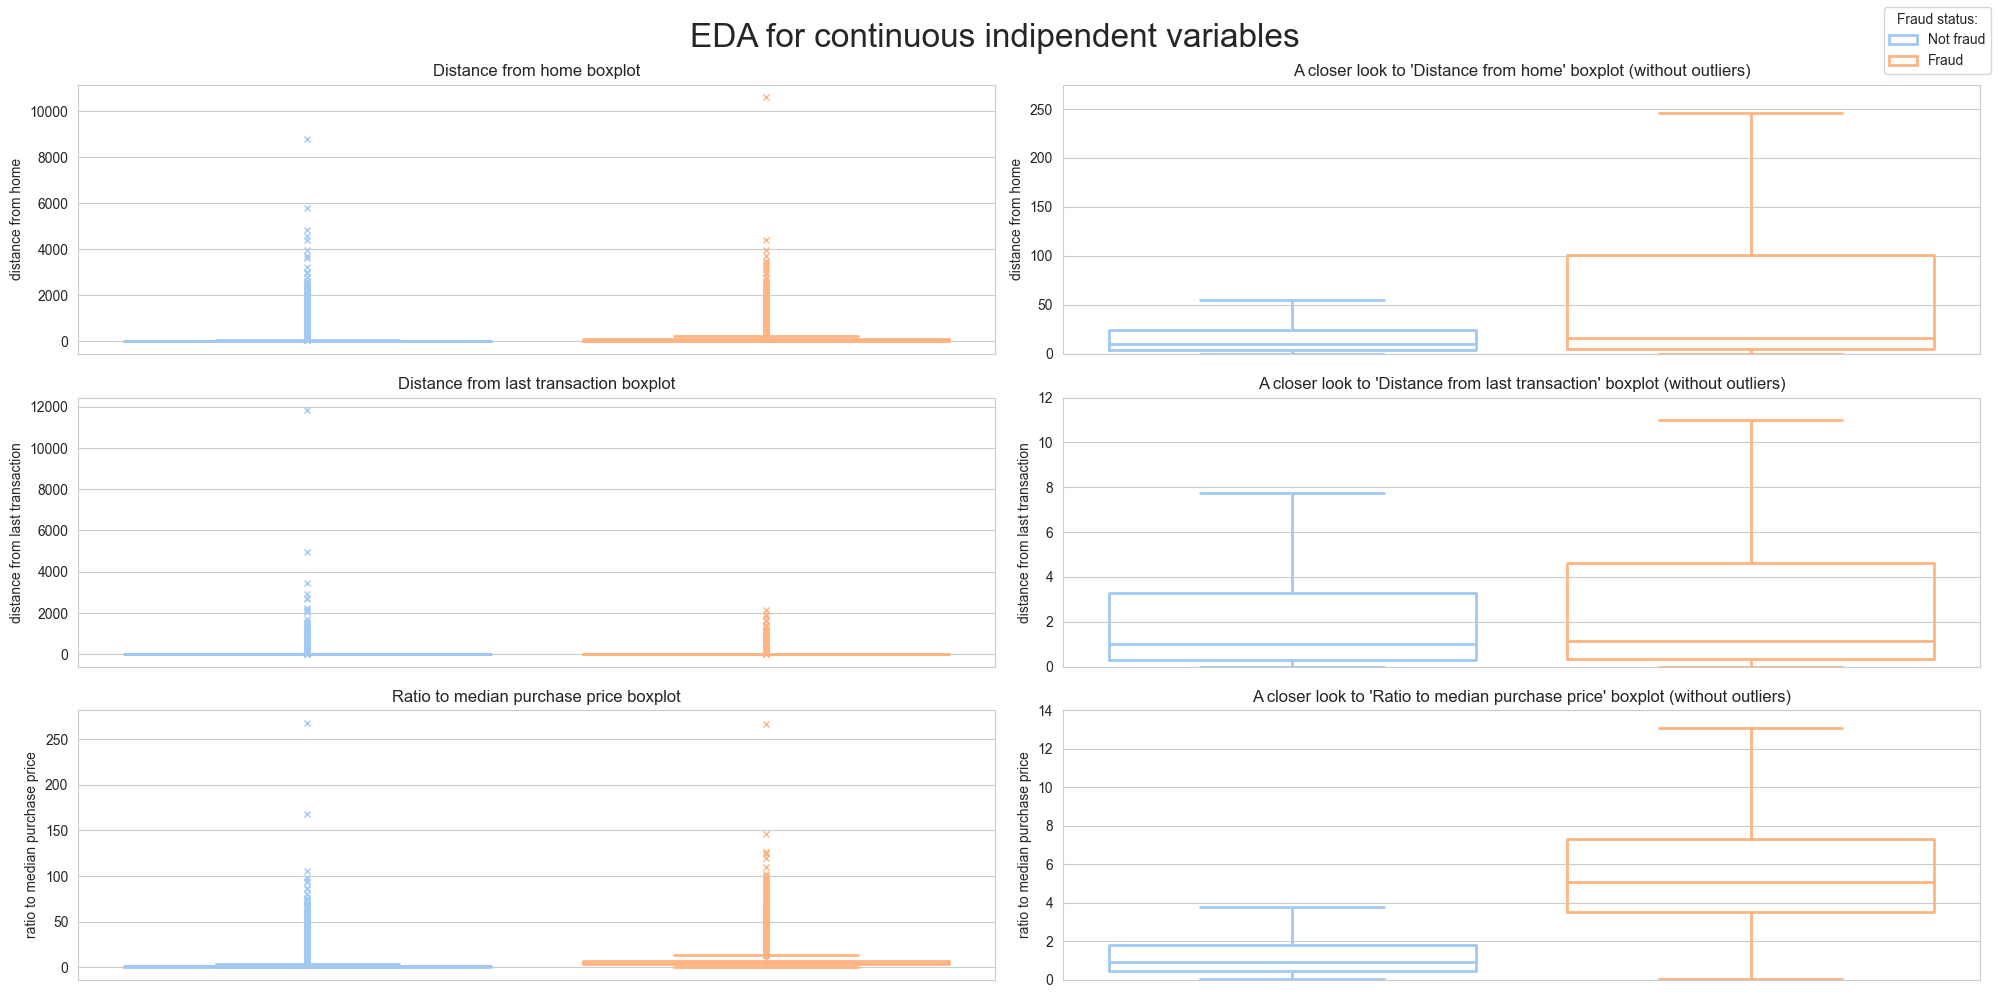

In [56]:
# Let's see some plots!
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10,8))
fig.set_figwidth(20)
fig.set_figheight(10)
fig.suptitle('EDA for continuous indipendent variables', fontsize = 24)

flierprops = dict(marker='x', markersize=5) # Outliers display settings.

# first axis
bp1 = sns.boxplot(x = 'fraud', y = 'distance_from_home', data = df, ax = axs[0,0], fill = False, hue = 'fraud', palette = 'pastel', linewidth= 2, flierprops = flierprops)
axs[0,0].set_title('Distance from home boxplot')
axs[0,0].set_ylabel('distance from home')

# second axis
bp2 =  sns.boxplot(x = 'fraud', y = 'distance_from_home', data = df, ax = axs[0,1], fill = False, hue = 'fraud', palette = 'pastel', linewidth= 2, showfliers = False)
axs[0,1].set_title('A closer look to \'Distance from home\' boxplot (without outliers)')
axs[0,1].set_ylabel('distance from home')
axs[0,1].set_ylim(0,275)

# third axis
bp3 = sns.boxplot(x = 'fraud', y = 'distance_from_last_transaction', data = df, ax = axs[1,0], fill = False, hue = 'fraud', palette = 'pastel', linewidth= 2, flierprops = flierprops)
axs[1,0].set_title('Distance from last transaction boxplot')
axs[1,0].set_ylabel('distance from last transaction')

# fourth axis
bp4 =sns.boxplot(x = 'fraud', y = 'distance_from_last_transaction', data = df, ax = axs[1,1], fill = False, hue = 'fraud', palette = 'pastel', linewidth= 2, showfliers = False)
axs[1,1].set_title('A closer look to \'Distance from last transaction\' boxplot (without outliers)')
axs[1,1].set_ylabel('distance from last transaction')
axs[1,1].set_ylim(0,12)

# fifth axis
bp5 = sns.boxplot(x = 'fraud', y = 'ratio_to_median_purchase_price', data = df, ax = axs[2,0], fill = False, hue = 'fraud', palette = 'pastel', linewidth= 2, flierprops = flierprops)
axs[2,0].set_title('Ratio to median purchase price boxplot')
axs[2,0].set_ylabel('ratio to median purchase price')

# sixth axis
bp6 = sns.boxplot(x = 'fraud', y = 'ratio_to_median_purchase_price', data = df, ax = axs[2,1], fill = False, hue = 'fraud', palette = 'pastel', linewidth= 2, showfliers = False)
axs[2,1].set_title('A closer look to \'Ratio to median purchase price\' boxplot (without outliers)')
axs[2,1].set_ylabel('ratio to median purchase price')
axs[2,1].set_ylim(0,14)

for plot in (bp1, bp2, bp3, bp4, bp5, bp6):
    plot.set(xlabel=None, xticklabels=[])
    plot.tick_params(bottom=False) 
    plot.legend_.remove()

handles, previous_labels = axs[0,0].get_legend_handles_labels()
legend_labels = {0.0: 'Not fraud', 1.0: 'Fraud'}
new_labels = [value for value in legend_labels.values()]
fig.legend(handles, new_labels, title = 'Fraud status:')


plt.tight_layout()
plt.show()

As we already stated previously, the plots showed above tell us that the data are not normally distributed and there's a certain number of outliers that we'll calculate soon.
Most of the data are "compressed" in the interquartile range (IQR), which has a sharp distribution. On the other hand, outliers show a broader distribution.

The 'ratio to median purchase price' feature is the only indipendent continuous variable that has two non-overlapping distributions if we ignore outliers.

Let's calculate outliers number for each feature.

In [ ]:
# This function calculates the number of outlier for some columns and their percentage with respect to all values in the corresponding column.


def calc_outlier(): 

    cont_var = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price'] # List of continuous features.
    list_val = [0.0, 1.0]

    for col in cont_var:
        df_col = df[[col, 'fraud']]
        print(f'{col}: \n')

        for val in list_val:
            col_series = df_col[df_col['fraud'] == val][col]
            q25 = col_series.quantile(q =0.25)
            q75 = col_series.quantile(q =0.75)
            iqr = q75 - q25
            outlier_treshold = q75 + 1.5*iqr
            outliers_num = col_series.loc[lambda x: x >= outlier_treshold].shape[0]
            outliers_perc= np.round((outliers_num/col_series.shape[0])*100,2)
            fraud_str = 'Fraud true' if val == 1.0 else 'Fraud false'
            print( f'{fraud_str} \n Outliers number is: {outliers_num} \n Outliers percentage is: {outliers_perc} \n\n')
        print('\n')

calc_outlier()



distance_from_home: 

Fraud false 
 Outliers number is: 86502 
 Outliers percentage is: 9.48 


Fraud true 
 Outliers number is: 4901 
 Outliers percentage is: 5.61 




distance_from_last_transaction: 

Fraud false 
 Outliers number is: 111325 
 Outliers percentage is: 12.2 


Fraud true 
 Outliers number is: 13318 
 Outliers percentage is: 15.24 




ratio_to_median_purchase_price: 

Fraud false 
 Outliers number is: 46767 
 Outliers percentage is: 5.12 


Fraud true 
 Outliers number is: 5996 
 Outliers percentage is: 6.86 






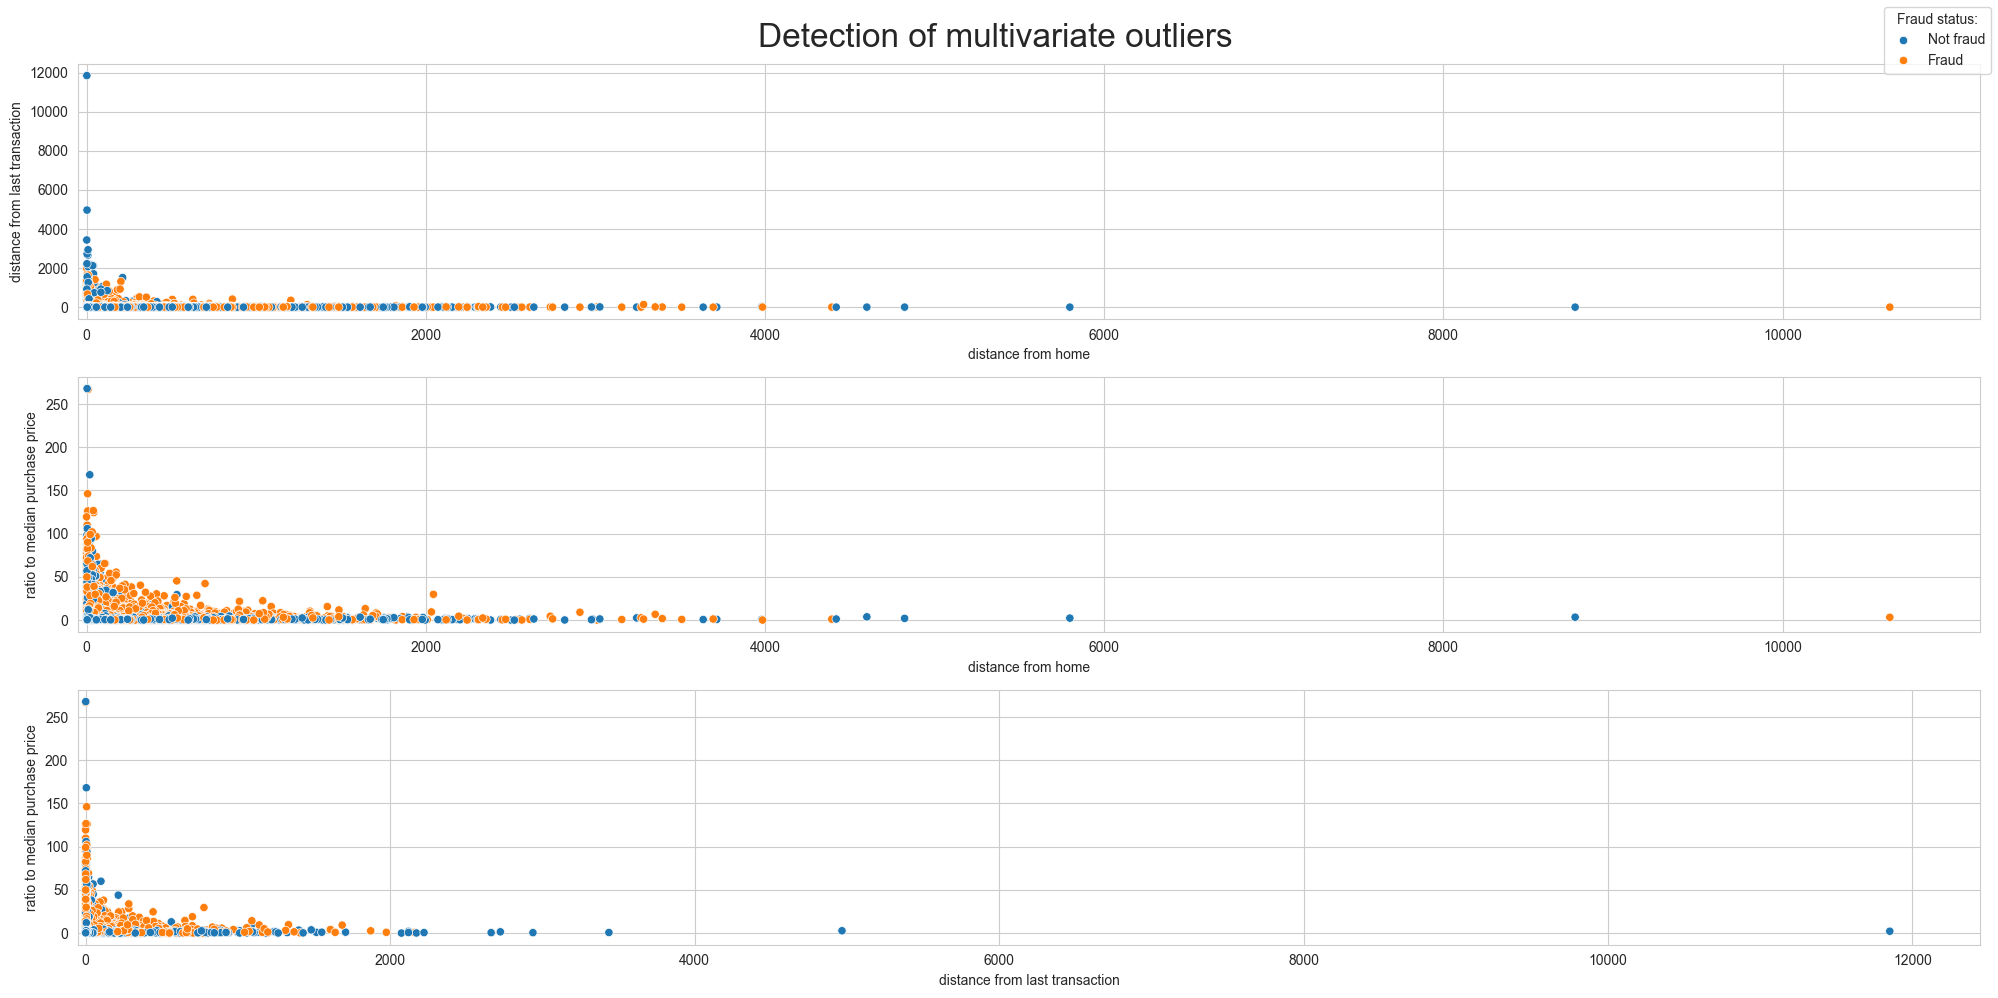

In [51]:
# Let's see if these points are outliers in two features space.
#cont_var =['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price']

fig0_2, axs = plt.subplots(nrows =3, ncols = 1, figsize = (10,8))
fig0_2.set_figwidth(20)
fig0_2.set_figheight(10)
fig0_2.suptitle('Detection of multivariate outliers', fontsize = 24)

# first plot
sns.scatterplot(x= 'distance_from_home', y = 'distance_from_last_transaction', hue = 'fraud',data = df, ax = axs[0])

axs[0].set_xlabel('distance from home')
axs[0].set_ylabel('distance from last transaction')

#second plot
sns.scatterplot(x= 'distance_from_home', y = 'ratio_to_median_purchase_price', hue = 'fraud' ,data = df, ax = axs[1])

axs[1].set_xlabel('distance from home')
axs[1].set_ylabel('ratio to median purchase price')

#third plot
sns.scatterplot(x= 'distance_from_last_transaction', y = 'ratio_to_median_purchase_price', hue = 'fraud' ,data = df, ax = axs[2])

axs[2].set_xlabel('distance from last transaction')
axs[2].set_ylabel('ratio to median purchase price')


for ax in axs:
    ax.set_xlim(-50,)
    ax.legend_.remove()

handles, previous_labels = axs[0].get_legend_handles_labels()
legend_labels = {0.0: 'Not fraud', 1.0: 'Fraud'}
new_labels = [value for value in legend_labels.values()]
fig0_2.legend(handles, new_labels, title = 'Fraud status:')
    
fig0_2.tight_layout()

Outliers can still be found in multivariate scatter plots.

Anyway, we'll keep these points because they simply represent the effect of a natural variation and not the effect of any sort of error. 

Let's see the counter plots of categorical variables.

C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\3483890566.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(['No', 'Yes'])
C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\3483890566.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(['No', 'Yes'])
C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\3483890566.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(['No', 'Yes'])
C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\3483890566.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(['No', 'Yes'])


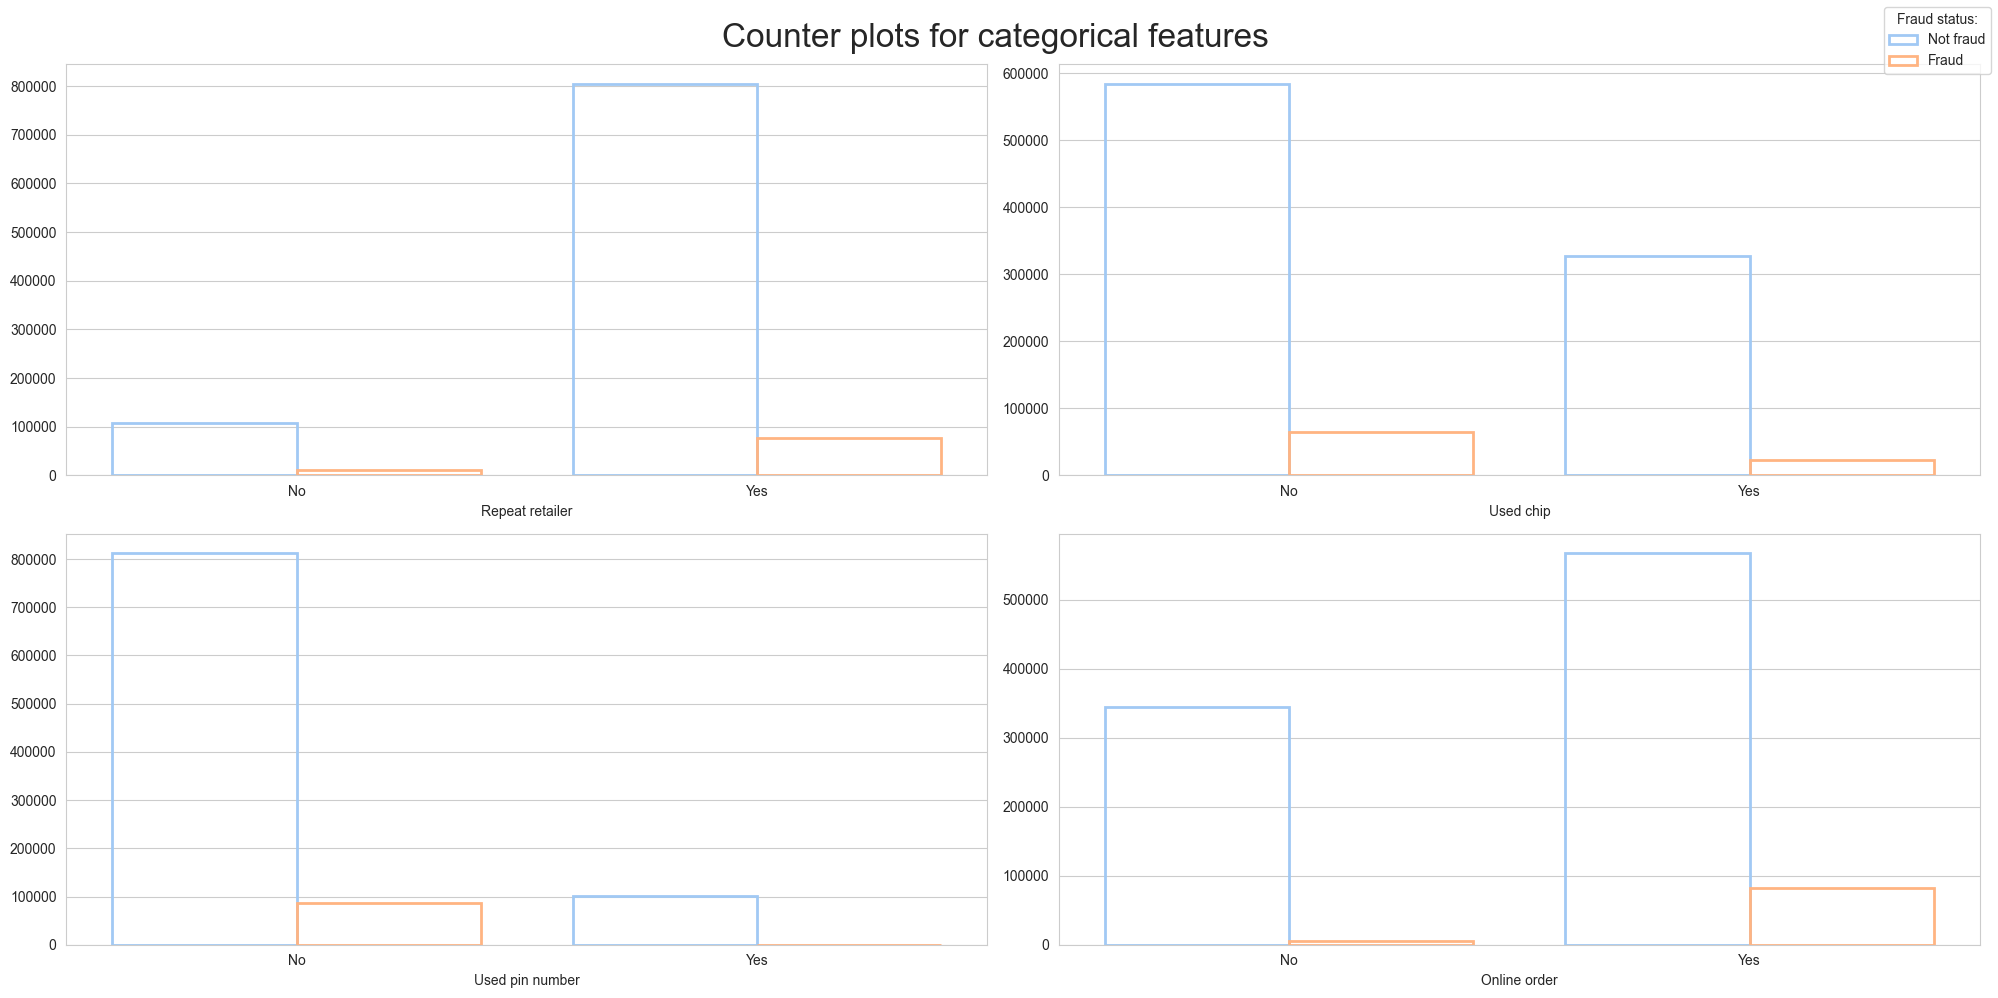

In [58]:
#COUNTER PLOTS OF CATEGORICAL VARIABLES 

fig1, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
fig1.set_figwidth(20)
fig1.set_figheight(10)
fig1.suptitle('Counter plots for categorical features', fontsize = 24)

# first axis
sns.countplot(x = 'repeat_retailer', hue = 'fraud', data = df, ax = axs[0,0], palette = 'pastel', fill = False, linewidth = 2)
#axs[0,0].set_title('Repeat retailer countplot')
axs[0,0].set_xticklabels(['No', 'Yes'])
axs[0,0].set_xlabel('Repeat retailer')

# second axis
sns.countplot(x = 'used_chip', hue = 'fraud', data = df, ax = axs[0,1], palette = 'pastel', fill = False, linewidth = 2)
#axs[0,1].set_title('Used chip countplot')
axs[0,1].set_xticklabels(['No', 'Yes'])
axs[0,1].set_xlabel('Used chip')

# third axis
sns.countplot(x = 'used_pin_number', hue = 'fraud', data = df, ax = axs[1,0], palette = 'pastel', fill = False, linewidth = 2)
#axs[1,0].set_title('Used pin number countplot')
axs[1,0].set_xticklabels(['No', 'Yes'])
axs[1,0].set_xlabel('Used pin number')

# fourth axis
sns.countplot(x = 'online_order', hue = 'fraud', data = df, ax = axs[1,1], palette = 'pastel', fill = False, linewidth = 2)
#axs[1,1].set_title('Online order countplot')
axs[1,1].set_xticklabels(['No', 'Yes'])
axs[1,1].set_xlabel('Online order')

for r in range(2):
    for c in range(2):
        axs[r,c].legend_.remove()
        axs[r,c].set_ylabel(None)

handles, previous_labels = axs[0,0].get_legend_handles_labels()
legend_labels = {0.0: 'Not fraud', 1.0: 'Fraud'}
new_labels = [value for value in legend_labels.values()]
fig1.legend(handles, new_labels, title = 'Fraud status:')

fig1.tight_layout()

As we can see in the counter plots above, there's a strong size difference among each bins pair. This difference is due mainly to inbalanced data. 

Instead, comparing the fraud bins within each plot, we can assume that most of the scam transactions were performed without using PIN number or chip. Furthermore, most of these payments regard online orders.

Let's calculate the percentage of fraud transactions for all these cases:

In [33]:
cat_var = ['used_pin_number', 'used_chip' , 'repeat_retailer', 'online_order'] # List of categorical features

fraud_true = df[df['fraud'] == 1.0].shape[0] # Total number of fraudolent transactions.


for col in cat_var:

    fraud_true_col_false = df[(df[col] == 0.0) & (df['fraud'] == 1.0)][col].count() # Number of fraudolent transaction with col == 0.
    perc_fraud = np.round((fraud_true_col_false/fraud_true)*100,2) # Percentage of fraudolent number with col == 0 with respect to all fraudolent transactions.
    
    print(f'Percentage of fraudolent transactions with {col} == False with respect to total fraudolent transactions : {perc_fraud} % \n')

Percentage of fraudolent transactions with used_pin_number == False with respect to total fraudolent transactions : 99.69 % 

Percentage of fraudolent transactions with used_chip == False with respect to total fraudolent transactions : 74.36 % 

Percentage of fraudolent transactions with repeat_retailer == False with respect to total fraudolent transactions : 11.99 % 

Percentage of fraudolent transactions with online_order == False with respect to total fraudolent transactions : 5.37 % 



C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\1671152939.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r,c].set_yticklabels(['','No', '', '', '', '', 'Yes'])
C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\1671152939.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r,c].set_yticklabels(['','No', '', '', '', '', 'Yes'])
C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\1671152939.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r,c].set_yticklabels(['','No', '', '', '', '', 'Yes'])
C:\Users\aschiro\AppData\Local\Temp\ipykernel_4296\1671152939.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[r,c].set_yticklabels(['

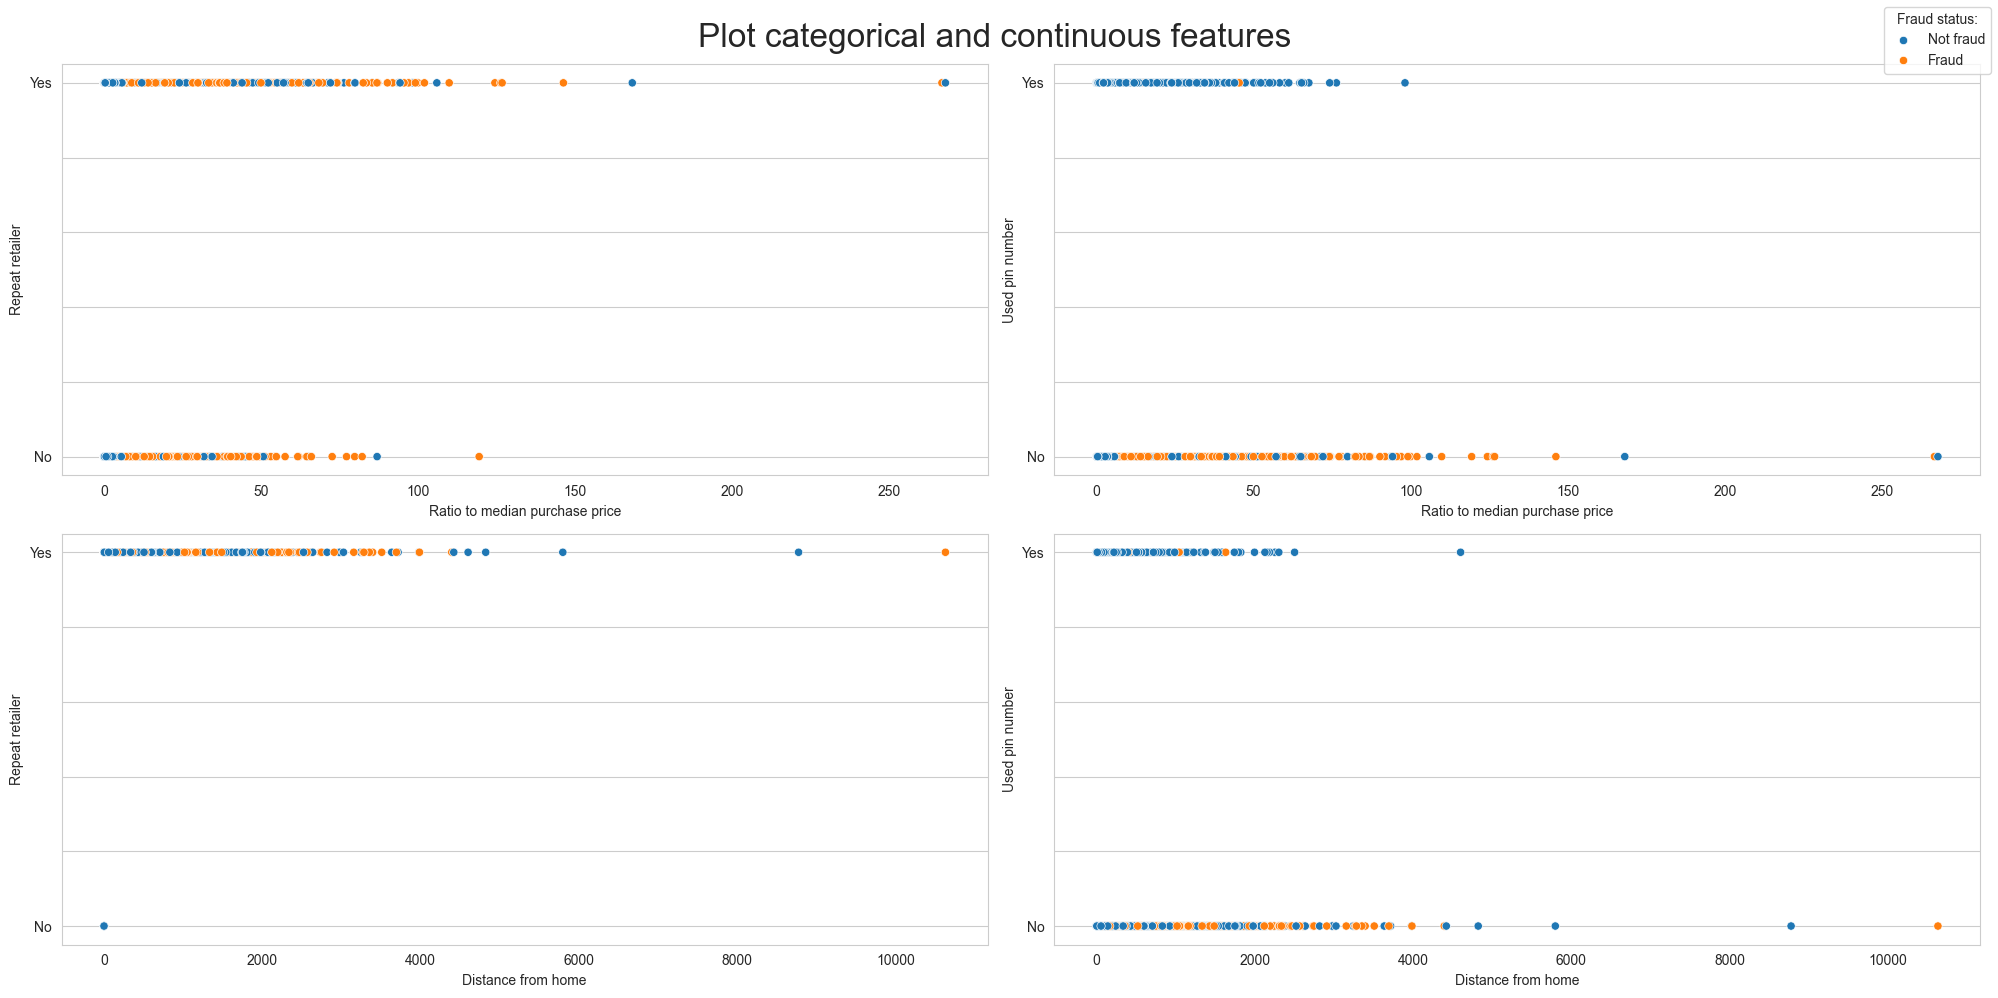

In [64]:
#Let's see what happens if we plot two indipendent variables coloring the points according to their values in 'fraud' column.


fig2, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
fig2.set_figwidth(20)
fig2.set_figheight(10)
fig2.suptitle('Plot categorical and continuous features', fontsize = 24)

# first plot
sns.scatterplot(x= 'ratio_to_median_purchase_price', y = 'repeat_retailer', hue = 'fraud' ,data = df, ax = axs[0,0])

axs[0,0].set_xlabel('Ratio to median purchase price')
axs[0,0].set_ylabel('Repeat retailer')

# second plot
sns.scatterplot(x= 'ratio_to_median_purchase_price', y = 'used_pin_number', hue = 'fraud' ,data = df, ax = axs[0,1])

axs[0,1].set_xlabel('Ratio to median purchase price')
axs[0,1].set_ylabel('Used pin number')                    


# third plot
sns.scatterplot(x= 'distance_from_home', y = 'repeat_retailer', hue = 'fraud' ,data = df, ax = axs[1,0])

axs[1,0].set_xlabel('Distance from home')
axs[1,0].set_ylabel('Repeat retailer')

# fourth plot
sns.scatterplot(x= 'distance_from_home', y = 'used_pin_number', hue = 'fraud' ,data = df, ax = axs[1,1])

axs[1,1].set_xlabel('Distance from home')
axs[1,1].set_ylabel('Used pin number')

# Set one legend for all plots.
for r in range(2):
    for c in range(2):
        axs[r,c].legend_.remove()
        axs[r,c].set_yticklabels(['','No', '', '', '', '', 'Yes'])
        axs[r,c].grid(axis = 'x')

handles, previous_labels = axs[0,0].get_legend_handles_labels()
legend_labels = {0.0: 'Not fraud', 1.0: 'Fraud'}
new_labels = [value for value in legend_labels.values()]
fig2.legend(handles, new_labels, title = 'Fraud status:')

fig2.tight_layout()
plt.show()


The "Used pin number vs Ratio to median purchase price" plot shows the best splitting between fraud and non fraud transactions.

In the "Repeat retailer vs Distance from home plot", there's sharp distribution for repeat_retailer == 0. \
Printing some statistics we can further investigate this distribution:

In [57]:
print('Stats for \'distance_from_home\' distribution when repeat_retailer == 0: \n', df[df['repeat_retailer'] == 0.0]['distance_from_home'].describe(), '\n\n')

print('Fraud values for this distribution: \n',df[df['repeat_retailer'] == 0.0].groupby('fraud')['distance_from_home'].count())


Stats for 'distance_from_home' distribution when repeat_retailer == 0: 
 count    118464.000000
mean          1.098464
std           0.481877
min           0.004874
25%           0.711491
50%           1.120051
75%           1.510172
max           1.900241
Name: distance_from_home, dtype: float64 


Fraud values for this distribution: 
 fraud
0.0    107986
1.0     10478
Name: distance_from_home, dtype: int64


**Data preparation**

In this section we'll generate synthetic data in order to rebalance our dataframe: we need more data with 'fraud' value == 1.
To do so, we'll use MostlyAI tools.

First, we create a new 'target' column with string values to make MostlyAI work properly:

In [58]:
df['fraud_cat'] = np.where(df['fraud'] == 0.0, 'n', 'y')

df['fraud_cat'] = df['fraud_cat'].astype(str)
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
fraud_cat                          object
dtype: object

In [ ]:
# This function generates and stores in a local folder the synthetic dataframe.

def generate_data(tries: int =1):

    try:

# Enhance our data with mostlyAI.
# Train a generator on the original training data
        g = mostly.train(data=df, name='Rebalancing fraud status')

        # Generate a synthetic dataset with rebalancing of the fraud column to 40% 1.0 category
        sd = mostly.generate(generator=g, config={
            'name': 'Rebalancing fraud status',
            'tables': [{
                'name': 'data',
                'configuration': {
                    'rebalancing': {
                        'column': 'fraud_cat', 
                        'probabilities': {'y': 0.4}  
                    }
                }
            }]
        })
        
        syn_df = sd.data()
        print(f"Created synthetic data with {syn_df.shape[0]:,} records and {syn_df.shape[1]:,} attributes")                         
        syn_df.to_csv(path_syn_df)

    except: # Handles connection errors.
        print(traceback.format_exc())
        tries > 1 and generate_data(tries-1)
        

# Uncomment the line below only if you haven't downloaded syn_df dataframe yet. Otherwise, skip this cell code.

# generate_data(tries = 2) 



Created generator ]8;id=950936;https://app.mostly.ai/d/generators/016e127c-efa4-4f72-b6a6-6db76ef64c4d\016e127c-efa4-4f72-b6a6-6db76ef64c4d]8;;\

Started generator training

Output()

🎉 Your generator is ready! Use it to create synthetic data. Share it so others can do the same.

Created synthetic dataset ]8;id=384850;https://app.mostly.ai/d/synthetic-datasets/656d0e67-ecbc-42ba-b11f-4fdde58ea20e\656d0e67-ecbc-42ba-b11f-4fdde58ea20e]8;;\ with generator ]8;id=376136;https://app.mostly.ai/d/generators/016e127c-efa4-4f72-b6a6-6db76ef64c4d\016e127c-efa4-4f72-b6a6-6db76ef64c4d]8;;\

Started synthetic dataset generation

Output()

🎉 Your synthetic dataset is ready! Use it to consume the generated data. Share it so others can do the same.

Created synthetic data with 1,000,000 records and 10 attributes


In [161]:
syn_df = pd.read_csv(path_syn_df)

syn_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace= True)

syn_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,fraud_cat
0,7.193238,0.177948,2.127418,1,0,0,0,0,n
1,49.353241,0.432223,0.412289,1,0,0,1,0,n
2,1.203740,0.751670,0.641669,0,1,0,1,0,n
3,1.134532,41.862459,0.668259,0,0,0,1,1,y
4,13.717782,0.839196,5.870904,1,0,0,1,1,y


In [35]:
fraud_value =syn_df[syn_df['fraud'] == 1.0]['fraud'].count()

ratiofraud = np.round((fraud_value/syn_df.shape[0])*100 ,2)

print(f'Percentage of fraud transaction in synthetic dataframe is {ratiofraud}%')

Percentage of fraud transaction in synthetic dataframe is 39.91%


In [61]:
syn_df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
color_fraud                        object
fraud_cat                          object
dtype: object

In [4]:
X = syn_df.drop(['fraud', 'fraud_cat', 'color_fraud'], axis = 1)
X.head()
Y = syn_df[['fraud']]
Y.head()


,fraud
0,0
1,0
2,0
3,1
4,1


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state= 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

st_sc = StandardScaler()

# Scaling train and test dataset.
x_train_p = st_sc.fit_transform(x_train)
x_test_p = st_sc.transform(x_test)

(700000, 7) (300000, 7) (700000, 1) (300000, 1)


**MODELLING BUILDING AND EVALUATION**

**Decision Tree Classifier**

Since decision tree classifier are prone to overfitting, we start with a low value of max_depth parameter and then increasing it.
The parameter minimum_samples_leaf is set to 1 by default.

Here's the best Decision tree classifier we found:

In [67]:
DTC = DecisionTreeClassifier(random_state=0, max_depth= 4)
crossval_DTC = cross_validate(DTC, x_train_p, y_train, scoring = ['accuracy','recall_macro', 'precision_macro' , 'f1_macro'], cv = 5, return_train_score= True, return_estimator= True)

print('Fit time: \n', crossval_DTC['fit_time'])
print('-'*30, '\n')

print('Accuracy (train vs validation): \n')
print(crossval_DTC['train_accuracy'], '\n')
print(crossval_DTC['test_accuracy'], '\n')
print('-'*30, '\n')

print('Recall (train vs validation): \n')
print(crossval_DTC['train_recall_macro'], '\n')
print(crossval_DTC['test_recall_macro'], '\n')
print('-'*30, '\n')

print('Precision (train vs validation): \n')
print(crossval_DTC['train_precision_macro'], '\n')
print(crossval_DTC['test_precision_macro'], '\n')
print('-'*30, '\n')

print('F1 (train vs validation): \n')
print(crossval_DTC['train_f1_macro'],'\n')
print(crossval_DTC['test_f1_macro'], '\n')
print('-'*30)

Fit time: 
 [1.58188224 1.56751013 1.51726246 1.49067998 1.73948431]
------------------------------ 

Accuracy (train vs validation): 

[0.91999643 0.91975714 0.91993571 0.91959821 0.91958214] 

[0.91882857 0.91982143 0.91911429 0.92047857 0.92053571] 

------------------------------ 

Recall (train vs validation): 

[0.90631036 0.90598548 0.90625715 0.90577818 0.90579332] 

[0.90484601 0.90614821 0.90508248 0.90700726 0.90694376] 

------------------------------ 

Precision (train vs validation): 

[0.92824104 0.92810181 0.92815843 0.9279953  0.92792541] 

[0.92736391 0.92801582 0.92777761 0.92845539 0.92871735] 

------------------------------ 

F1 (train vs validation): 

[0.91463665 0.91436497 0.91457415 0.91418624 0.91417607] 

[0.91333631 0.91445434 0.91362742 0.91519296 0.91522743] 

------------------------------


In [ ]:
DTC.fit(x_train_p, y_train) # Refit the decision tree on the whole train dataset.
y_train_pred_dtc = DTC.predict(x_train_p)

acc_train_dtc = accuracy_score(y_train, y_train_pred_dtc)
recall_train_dtc = recall_score(y_train, y_train_pred_dtc, average= 'macro')
precision_train_dtc = precision_score(y_train, y_train_pred_dtc, average= 'macro')
f1_train_dtc = f1_score(y_train, y_train_pred_dtc, average= 'macro')

# Evaluate train dataset metrics
print('Train dataset metrics: \n')
print(f'{acc_train_dtc = :.2f}')
print(f'{recall_train_dtc = :.2f}')
print(f'{precision_train_dtc = :.2f}')
print(f'{f1_train_dtc = :.2f}')

Train dataset metrics: 

acc_train_dtc = 0.92
recall_train_dtc = 0.91
precision_train_dtc = 0.93
f1_train_dtc = 0.91


As we expected, metrics aren't changed while fitting on the entire train dataset.

Let's see how the decision tree was built:

In [69]:
export_dtc = sklearn.tree.export_text(DTC, feature_names= X.columns)
print(export_dtc)

|--- ratio_to_median_purchase_price <= -0.02
|   |--- distance_from_home <= 0.06
|   |   |--- distance_from_last_transaction <= 0.03
|   |   |   |--- online_order <= -0.62
|   |   |   |   |--- class: 0
|   |   |   |--- online_order >  -0.62
|   |   |   |   |--- class: 0
|   |   |--- distance_from_last_transaction >  0.03
|   |   |   |--- online_order <= -0.62
|   |   |   |   |--- class: 0
|   |   |   |--- online_order >  -0.62
|   |   |   |   |--- class: 1
|   |--- distance_from_home >  0.06
|   |   |--- online_order <= -0.62
|   |   |   |--- used_chip <= 0.40
|   |   |   |   |--- class: 0
|   |   |   |--- used_chip >  0.40
|   |   |   |   |--- class: 0
|   |   |--- online_order >  -0.62
|   |   |   |--- used_chip <= 0.40
|   |   |   |   |--- class: 1
|   |   |   |--- used_chip >  0.40
|   |   |   |   |--- class: 0
|--- ratio_to_median_purchase_price >  -0.02
|   |--- online_order <= -0.62
|   |   |--- repeat_retailer <= -1.16
|   |   |   |--- used_pin_number <= 1.77
|   |   |   |   |-

In [ ]:
# Predict target values on test datest.

y_pred_DTC = DTC.predict(x_test_p)


# Evaluation of decision tree on test dataset.
precision_DTC = sklearn.metrics.precision_score(y_test, y_pred_DTC, average = 'macro')
recall_DTC = sklearn.metrics.recall_score(y_test, y_pred_DTC, average = 'macro')
f1_DTC = sklearn.metrics.f1_score(y_test, y_pred_DTC, average = 'macro')
acc_DTC = accuracy_score(y_test, y_pred_DTC)

print(f'Precision: {precision_DTC:.2f}')
print(f'Recall: {recall_DTC:.2f}')
print(f'F1 Score: {f1_DTC:.2f}')
print(f'Accuracy score is: {acc_DTC:.2f}')


Precision: 0.93
Recall: 0.91
F1 Score: 0.91
Accuracy score is: 0.92


Let's display the confusion matrix for decision tree.

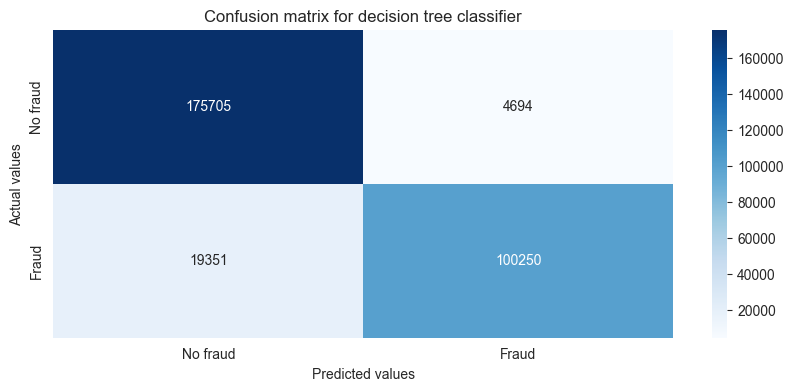

In [86]:
# Confusion matrix
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
plt.figure(figsize=(10,4))
sns.heatmap(cm_DTC, annot= True, fmt= 'd', cmap = 'Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion matrix for decision tree classifier')
plt.yticks(ticks = [.5, 1.5],labels = ['No fraud', 'Fraud'])
plt.xticks(ticks = [.5, 1.5],labels = ['No fraud', 'Fraud'])
plt.show()

The number of false negatives is greater than the number of false positives and this is why precision is slightly larger than recall.

**K-Nearest Neighbors classifier**

For KNN classifier, we won't performing cross validation because it's computationally expensive so we'll proceed in another way.

We are splitting train dataset in two sets: another train dataset and a validation dataset.
The latter will be use to evaluate KNN performance while changing n_neighbors parameter.


In [ ]:
# Flatten y arrays to suppress warning during classifier training.

y_train_np = np.ravel(y_train, order = 'C')
y_test_np = np.ravel(y_test, order = 'C')

In [7]:
x_train_two, x_val, y_train_two, y_val = train_test_split(x_train_p, y_train_np, test_size = 2/7, random_state= 42)

print(f'{x_train_two.shape = }, {y_train_two.shape = } \n')
print(f'{x_val.shape = }, {y_val.shape = } \n')

x_train_two.shape = (500000, 7), y_train_two.shape = (500000,) 

x_val.shape = (200000, 7), y_val.shape = (200000,) 



In [8]:

neighbors = [n for n in range(5, 30)] # Number of neighbors to be evaluated.

knn_dict = {}

for n in neighbors:

    # Train KNN classifier for n neighbors
    KNN = KNeighborsClassifier(n_neighbors= n, weights= 'distance')
    KNN.fit(x_train_two, y_train_two)
    y_pred_train_KNN = KNN.predict(x_train_two)

    # Evaluation metrics for train dataset
    precision_train_KNN = sklearn.metrics.precision_score(y_train_two, y_pred_train_KNN, average = 'macro')
    recall_train_KNN = sklearn.metrics.recall_score(y_train_two, y_pred_train_KNN, average = 'macro')
    f1_train_KNN = sklearn.metrics.f1_score(y_train_two, y_pred_train_KNN, average = 'macro')
    acc_train_KNN =accuracy_score(y_train_two, y_pred_train_KNN)

    # Test KNN classifier on validation dataset
    y_knn_pred_val = KNN.predict(x_val)

    #Evaluation metrics for validation dataset
    precision_val_KNN = sklearn.metrics.precision_score(y_val, y_knn_pred_val, average = 'macro')
    recall_val_KNN = sklearn.metrics.recall_score(y_val, y_knn_pred_val, average = 'macro')
    f1_val_KNN = sklearn.metrics.f1_score(y_val, y_knn_pred_val, average = 'macro')
    acc_val_KNN =accuracy_score(y_val, y_knn_pred_val)

    # Add estimators and its metrics to dictionary
    knn_dict[n] = (KNN, (acc_val_KNN, precision_val_KNN, recall_val_KNN, f1_val_KNN))

    print(f'Metrics for {n} neighbors: \n')
          
    print('Training dataset: \n')

    print(f'Accuracy score is: {acc_train_KNN} \n')
    print(f'Precision score is: {precision_train_KNN} \n')
    print(f'Recall score is: {recall_train_KNN} \n')
    print(f'F1 score is: {f1_train_KNN} \n')
    print('-'*40, '\n')

    print('Validation dataset: \n')

    print(f'Accuracy score is: {acc_val_KNN} \n')
    print(f'Precision score is: {precision_val_KNN} \n')
    print(f'Recall score is: {recall_val_KNN} \n')
    print(f'F1 score is: {f1_val_KNN} \n')
    print('-'*40, '\n')
    print('-'*40, '\n')
    print('-'*40, '\n')



Metrics for 5 neighbors: 

Training dataset: 

Accuracy score is: 1.0 

Precision score is: 1.0 

Recall score is: 1.0 

F1 score is: 1.0 

---------------------------------------- 

Validation dataset: 

Accuracy score is: 0.90859 

Precision score is: 0.9110126621038519 

Recall score is: 0.8977411870571996 

F1 score is: 0.9032318716988589 

---------------------------------------- 

---------------------------------------- 

---------------------------------------- 

Metrics for 6 neighbors: 

Training dataset: 

Accuracy score is: 1.0 

Precision score is: 1.0 

Recall score is: 1.0 

F1 score is: 1.0 

---------------------------------------- 

Validation dataset: 

Accuracy score is: 0.91122 

Precision score is: 0.9145700489980076 

Recall score is: 0.8999094658221052 

F1 score is: 0.9058877624062879 

---------------------------------------- 

---------------------------------------- 

---------------------------------------- 

Metrics for 7 neighbors: 

Training dataset: 

A

Let's choose the right value of n trough the elbow method:

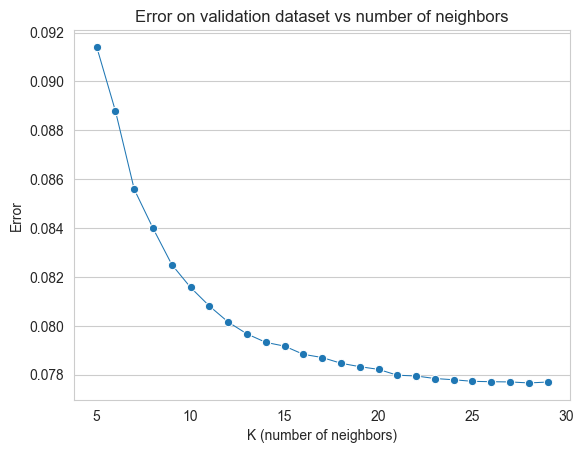

In [ ]:
# Elbow plot to evaluate the best value of k.
err_val_list = [1 - knn_dict[n][1][0] for n in neighbors] # List of errors on validation datasets for each value of n

sns.axes_style('whitegrid')
elbowplot = sns.lineplot(x = neighbors, y = err_val_list, marker = 'o', linewidth = 0.75)
elbowplot.set_title('Error on validation dataset vs number of neighbors')
elbowplot.set_xlabel('K (number of neighbors)')
elbowplot.set_ylabel('Error')
elbowplot.grid(axis = 'x')
    

In [ ]:
KNN_best = knn_dict[15][0] # Estimator selected by elbow method
print(KNN_best, type(KNN_best))

KNeighborsClassifier(n_neighbors=15, weights='distance') <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


In [ ]:
# Predict values for test dataset
y_knn_pred_test = KNN_best.predict(x_test_p)

#Evaluation metrics for test dation dataset
precision_test_KNN = sklearn.metrics.precision_score(y_test_np, y_knn_pred_test, average = 'macro')
recall_test_KNN = sklearn.metrics.recall_score(y_test_np, y_knn_pred_test, average = 'macro')
f1_test_KNN = sklearn.metrics.f1_score(y_test_np, y_knn_pred_test, average = 'macro')
acc_test_KNN =accuracy_score(y_test_np, y_knn_pred_test)

In [110]:
# Print metrics:

print(f'{acc_test_KNN = :.2f} \n')
print(f'{precision_test_KNN = :.2f} \n')
print(f'{recall_test_KNN = :.2f} \n')
print(f'{f1_test_KNN = :.2f} \n')



acc_test_KNN = 0.92 

precision_test_KNN = 0.93 

recall_test_KNN = 0.91 

f1_test_KNN = 0.91 



Here's the confusion matrix for KNN classifier.

The results are very similar to DTC results.

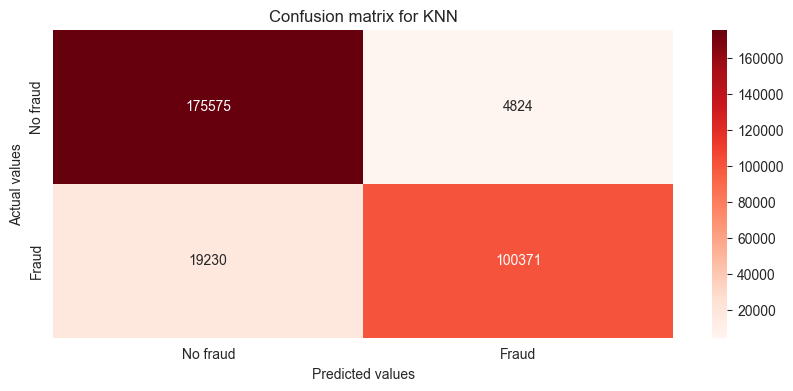

In [ ]:
# Confusion matrix for KNN classifier.

cm_KNN = confusion_matrix(y_test, y_knn_pred_test)
plt.figure(figsize=(10,4))
sns.heatmap(cm_KNN, annot= True, fmt= 'd', cmap = 'Reds')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion matrix for KNN')
plt.yticks(ticks = [.5, 1.5],labels = ['No fraud', 'Fraud'])
plt.xticks(ticks = [.5, 1.5],labels = ['No fraud', 'Fraud'])
plt.show()

**Logistic regression**

Finally, let's evaluate logistic regression classifier.

In [113]:
# Logistic regression

LR = LogisticRegression()

LR.fit(x_train_p, y_train_np)

# Train accuracy:
acc_train_LR = LR.score(x_train_p, y_train_np)
print('Train dataset accuracy \n')
print(f'{acc_train_LR = :.2f} \n\n')


# Evaluate LR classifier on test dataset.
y_test_pred_LR = LR.predict(x_test_p)

acc_test_LR = LR.score(x_test_p, y_test_np)
prec_test_LR = precision_score(y_test_np, y_test_pred_LR, average = 'macro')
recall_test_LR = recall_score(y_test_np, y_test_pred_LR, average = 'macro')
f1_test_LR = f1_score(y_test_np, y_test_pred_LR, average = 'macro')

print('Test dataset metrics: \n')
print(f'{acc_test_LR = :.2f}')
print(f'{prec_test_LR = :.2f}')
print(f'{recall_test_LR = :.2f}')
print(f'{f1_test_LR = :.2f}')

Train dataset accuracy 

acc_train_LR = 0.84 


Test dataset metrics: 

acc_test_LR = 0.84
prec_test_LR = 0.84
recall_test_LR = 0.81
f1_test_LR = 0.82


We are now comparing the three models trained above.

In [152]:
print('\t\t| Decision tree | K-Nearest Neighbors   | Logistic Regression')
print('-'*80)
print(f'Accuracy\t| {acc_DTC:.2f} \t\t| {acc_test_KNN:.2f}  \t\t| {acc_test_LR:.2f}')
print(f'Precision\t| {precision_DTC:.2f} \t\t| {precision_test_KNN:.2f} \t\t\t| {prec_test_LR:.2f}')
print(f'Recall\t\t| {recall_DTC:.2f}\t\t| {recall_test_KNN:.2f}\t\t\t| {recall_test_LR:.2f}')
print(f'F1-score\t| {f1_DTC:.2f} \t\t| {f1_test_KNN:.2f}\t\t\t| {f1_test_LR:.2f}')

		| Decision tree | K-Nearest Neighbors   | Logistic Regression
--------------------------------------------------------------------------------
Accuracy	| 0.92 		| 0.92  		| 0.84
Precision	| 0.93 		| 0.93 			| 0.84
Recall		| 0.91		| 0.91			| 0.81
F1-score	| 0.91 		| 0.91			| 0.82


**Conclusions**

We compared three machine learning classifier and we found out that KNN and decision tree show the best results, while logistic regressor performed worse than the formers.

Anyway, there's still some work to do to catch the fraudolent transactions classified as legitimate ones (false negatives).

The next steps should involve other machine learning techniques such as neural networks.